# Clustering Crypto

In [1015]:
import warnings
warnings.filterwarnings('ignore')

In [1016]:
# Initial imports
import pandas as pd
import hvplot.pandas
import numpy as np
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [1017]:
# Load the crypto_data.csv dataset.
file_path = "Data/crypto_data.csv"
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [1018]:
crypto_df.shape

(1252, 7)

In [1019]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [1020]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [1021]:
crypto_df.shape

(1144, 7)

In [1022]:
# Dropping "Unnamed: 0" column. After creating the dummies, the conclusion is that this 
# column is unnecessary
##traded_crypto_df = traded_crypto_df.drop(columns=["Unnamed: 0"])
##traded_crypto_df

In [1023]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df["Algorithm"].isnull().sum()

0

In [1024]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(columns=["IsTrading"])
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [1025]:
# Remove rows that have at least 1 null value.
crypto_df.dropna()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [1026]:
crypto_df["TotalCoinsMined"].value_counts()

0.000000e+00    152
1.000000e+09      7
1.000000e+08      7
2.000000e+07      2
2.500000e+07      2
               ... 
8.345040e+07      1
1.666282e+07      1
1.195525e+06      1
1.345549e+08      1
1.283270e+05      1
Name: TotalCoinsMined, Length: 520, dtype: int64

In [1027]:
crypto_df["TotalCoinsMined"] > 0

0        True
1       False
2        True
3       False
4       False
        ...  
1243    False
1244    False
1245     True
1246     True
1247     True
Name: TotalCoinsMined, Length: 1144, dtype: bool

In [1028]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.loc[traded_crypto_df["TotalCoinsMined"] > 0]
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [1029]:
#Set index to unanmed column
crypto_df.set_index("Unnamed: 0", inplace=True)
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [1030]:
# Create a new DataFrame that holds only the cryptocurrencies names.
#crypto_names_df = clean_crypto_df.copy()
# crypto_names_df = pd.DataFrame(clean_crypto_df["CoinName"], index=crypto_names_df.index)
crypto_names_df = crypto_df["CoinName"].to_frame()
crypto_names_df

,CoinName
Unnamed: 0,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex


In [1031]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
clean_crypto_df = crypto_df.drop(columns=["CoinName"])
clean_crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [1032]:
clean_crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [1033]:
# clean_crypto_df["TotalCoinSupply"] = clean_crypto_df["TotalCoinSupply"].astype(float)
# clean_crypto_df.columns.name = clean_crypto_df.index.name
# clean_crypto_df.index.name = None
clean_crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [1034]:
# Save cleaned crypto data to csv file
output_file_path = "Data/clean_crypto_data.csv"
clean_crypto_df.to_csv(output_file_path, index=True)

In [1035]:
# Save the crypto names to csv file
output_file_path = "Data/crypto_names.csv"
crypto_names_df.to_csv(output_file_path, index=True)

In [1036]:
crypto_names_df

,CoinName
Unnamed: 0,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex


In [1037]:
# Use get_dummies() to create variables for text features.
encoded_crypto_df = pd.get_dummies(clean_crypto_df, columns=["Algorithm", "ProofType"])
encoded_crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1038]:
# Save cleaned crypto data to csv file
output_file_path = "Data/X_encoded.csv"
encoded_crypto_df.to_csv(output_file_path, index=True)

In [1039]:
X_encoded = pd.read_csv("Data/X_encoded.csv", index_col=False)
X_encoded.head()

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1040]:
# drop the Unamed: 0 column
X_encoded = X_encoded.set_index("Unnamed: 0")
X_encoded.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1041]:
# Standardize the data with StandardScaler().
# Instantiate the object
scaler = StandardScaler()

# Train/fit the 
X_scaled = scaler.fit_transform(X_encoded)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [1042]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

In [1043]:
# Create a DataFrame with the three principal components.
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2", "PC 3"], index=X_encoded.index)
pca_df.head(10)
                             

,PC 1,PC 2,PC 3
Unnamed: 0,,,
42,-0.345515,1.000729,-0.556515
404,-0.328843,1.000961,-0.556817
1337,2.311710,1.691184,-0.558919
BTC,-0.141908,-1.301407,0.209641
ETH,-0.147870,-1.997623,0.342283
LTC,-0.170348,-1.163624,-0.055902
DASH,-0.397330,1.304962,-0.437128
XMR,-0.151894,-2.224355,0.419432
ETC,-0.146310,-1.997716,0.342265


In [1044]:
component1 = "{:.2%}".format(pca.explained_variance_ratio_[0])
component2 = "{:.2%}".format(pca.explained_variance_ratio_[1])
component3 = "{:.2%}".format(pca.explained_variance_ratio_[2])
print(f"The first principal component contains {component1}, the second principal component contains {component2}, and the third principal component contains {component3}.")

The first principal component contains 2.79%, the second principal component contains 2.14%, and the third principal component contains 2.05%.


In [1045]:
total = "{:.2%}".format(np.sum(pca.explained_variance_ratio_))
print(f"Together, they contains {total} of the information.")

Together, they contains 6.98% of the information.


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [1046]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")


:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [1047]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)
pca_df["class"] = model.labels_
pca_df.head()

,PC 1,PC 2,PC 3,class
Unnamed: 0,,,,
42,-0.345515,1.000729,-0.556515,0
404,-0.328843,1.000961,-0.556817,0
1337,2.311710,1.691184,-0.558919,0
BTC,-0.141908,-1.301407,0.209641,3
ETH,-0.147870,-1.997623,0.342283,3


In [1048]:
pca_df["class"].value_counts()

0    288
3    239
1      4
2      1
Name: class, dtype: int64

### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

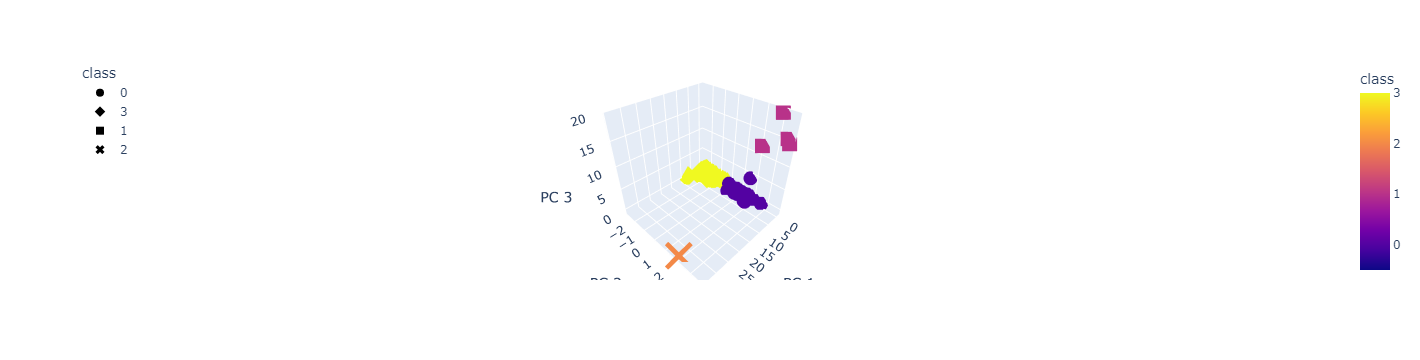

In [1050]:
# Creating a 3D-Scatter with the PCA data and the clusters
# Plotting the clusters with four features
fig = px.scatter_3d(pca_df, x="PC 1", y="PC 2", z="PC 3", color="class", symbol="class",width=1000)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [1051]:
# Create a table with tradable cryptocurrencies.
crypto_df = pd.read_csv("Data/clean_crypto_data.csv").set_index("Unnamed: 0")
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00


In [1052]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
clustered_df = pd.concat([crypto_df, pca_df], axis=1)
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class
Unnamed: 0,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.345515,1.000729,-0.556515,0
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.328843,1.000961,-0.556817,0
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.311710,1.691184,-0.558919,0
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.141908,-1.301407,0.209641,3
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.147870,-1.997623,0.342283,3


In [1053]:
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# clustered_df.insert(0, 'CoinName', crypto_names_df['CoinName'])
clustered_df = pd.concat([clustered_df, crypto_names_df], axis=1)
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
Unnamed: 0,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.345515,1.000729,-0.556515,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.328843,1.000961,-0.556817,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.311710,1.691184,-0.558919,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.141908,-1.301407,0.209641,3,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.147870,-1.997623,0.342283,3,Ethereum


In [1054]:
# Save clustered crypto data to csv file
output_file_path = "Data/clustered_crypto_data.csv"
clustered_df.to_csv(output_file_path, index=False)

In [1055]:
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
Unnamed: 0,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.345515,1.000729,-0.556515,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.328843,1.000961,-0.556817,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.311710,1.691184,-0.558919,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.141908,-1.301407,0.209641,3,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.147870,-1.997623,0.342283,3,Ethereum
LTC,Scrypt,PoW,6.303924e+07,8.400000e+07,-0.170348,-1.163624,-0.055902,3,Litecoin
DASH,X11,PoW/PoS,9.031294e+06,2.200000e+07,-0.397330,1.304962,-0.437128,0,Dash
XMR,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,-0.151894,-2.224355,0.419432,3,Monero
ETC,Ethash,PoW,1.133597e+08,2.100000e+08,-0.146310,-1.997716,0.342265,3,Ethereum Classic


In [1056]:
# Print the total number of tradable cryptocurrencies.
print(f"The total number of tradable cryptocurrencies is {clustered_df.shape[0]}.")

The total number of tradable cryptocurrencies is 532.


In [1057]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
mm_scaler = MinMaxScaler()
plot_data = mm_scaler.fit_transform(clustered_df[["TotalCoinsMined", "TotalCoinSupply"]])
plot_data[:5]

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585544e-03, 5.32000000e-04],
       [2.95755135e-02, 3.14159265e-01],
       [1.81084216e-05, 2.10000000e-05],
       [1.08773140e-04, 0.00000000e+00]])

In [1058]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(plot_data, columns=["TotalCoinsMined", "TotalCoinSupply"], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["class"]

plot_df.head(10)

,TotalCoinsMined,TotalCoinSupply,CoinName,Class
Unnamed: 0,,,,
42,0.000000,4.200000e-11,42 Coin,0
404,0.001066,5.320000e-04,404Coin,0
1337,0.029576,3.141593e-01,EliteCoin,0
BTC,0.000018,2.100000e-05,Bitcoin,3
ETH,0.000109,0.000000e+00,Ethereum,3
LTC,0.000064,8.400000e-05,Litecoin,3
DASH,0.000009,2.200000e-05,Dash,0
XMR,0.000017,0.000000e+00,Monero,3
ETC,0.000115,2.100000e-04,Ethereum Classic,3


In [1059]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", hover_cols="CoinName", by="Class")


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)